In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import os
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [ ]:
def Wrangle(data_path):
    df = pd.read_csv(data_path)
    df.drop(columns=["Unnamed: 32","id"],inplace=True,axis=1)
    df['diagnosis']=df['diagnosis'].map({"M":1,"B":0})
    return df



In [ ]:
df=Wrangle("data.csv")
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
def initial_exploration(data_frame):
    """Comprehensive initial data exploration"""
    print(f"Dataset shape: {data_frame.shape}")
    print("\nBasic statistics:")
    print(data_frame.drop("diagnosis", axis=1 ).describe().transpose())
    print("\nColumn data types:")
    print(data_frame.dtypes)
    print("\nMissing values:")
    print(data_frame.isnull().sum())

    if 'diagnosis' in data_frame.columns:
        print("\nClass distribution:")
        print(data_frame['diagnosis'].value_counts(normalize=True))
        class_counts = data_frame['diagnosis'].value_counts()
        print(f"Class imbalance ratio: {class_counts[0]/class_counts[1]:.2f}")

In [ ]:
initial_exploration(df)

Dataset shape: (569, 31)

Basic statistics:
                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    

In [ ]:
def EDA_BoxPlots(df):
    numeric_cols = df.drop("diagnosis", axis=1 ).select_dtypes(include=[np.number]).columns

    # Calculate rows/cols for subplots
    n_cols = 3
    n_rows = (len(numeric_cols) // n_cols + 1)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(col)
    for j in range(i + 1, len(axes)):
          axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

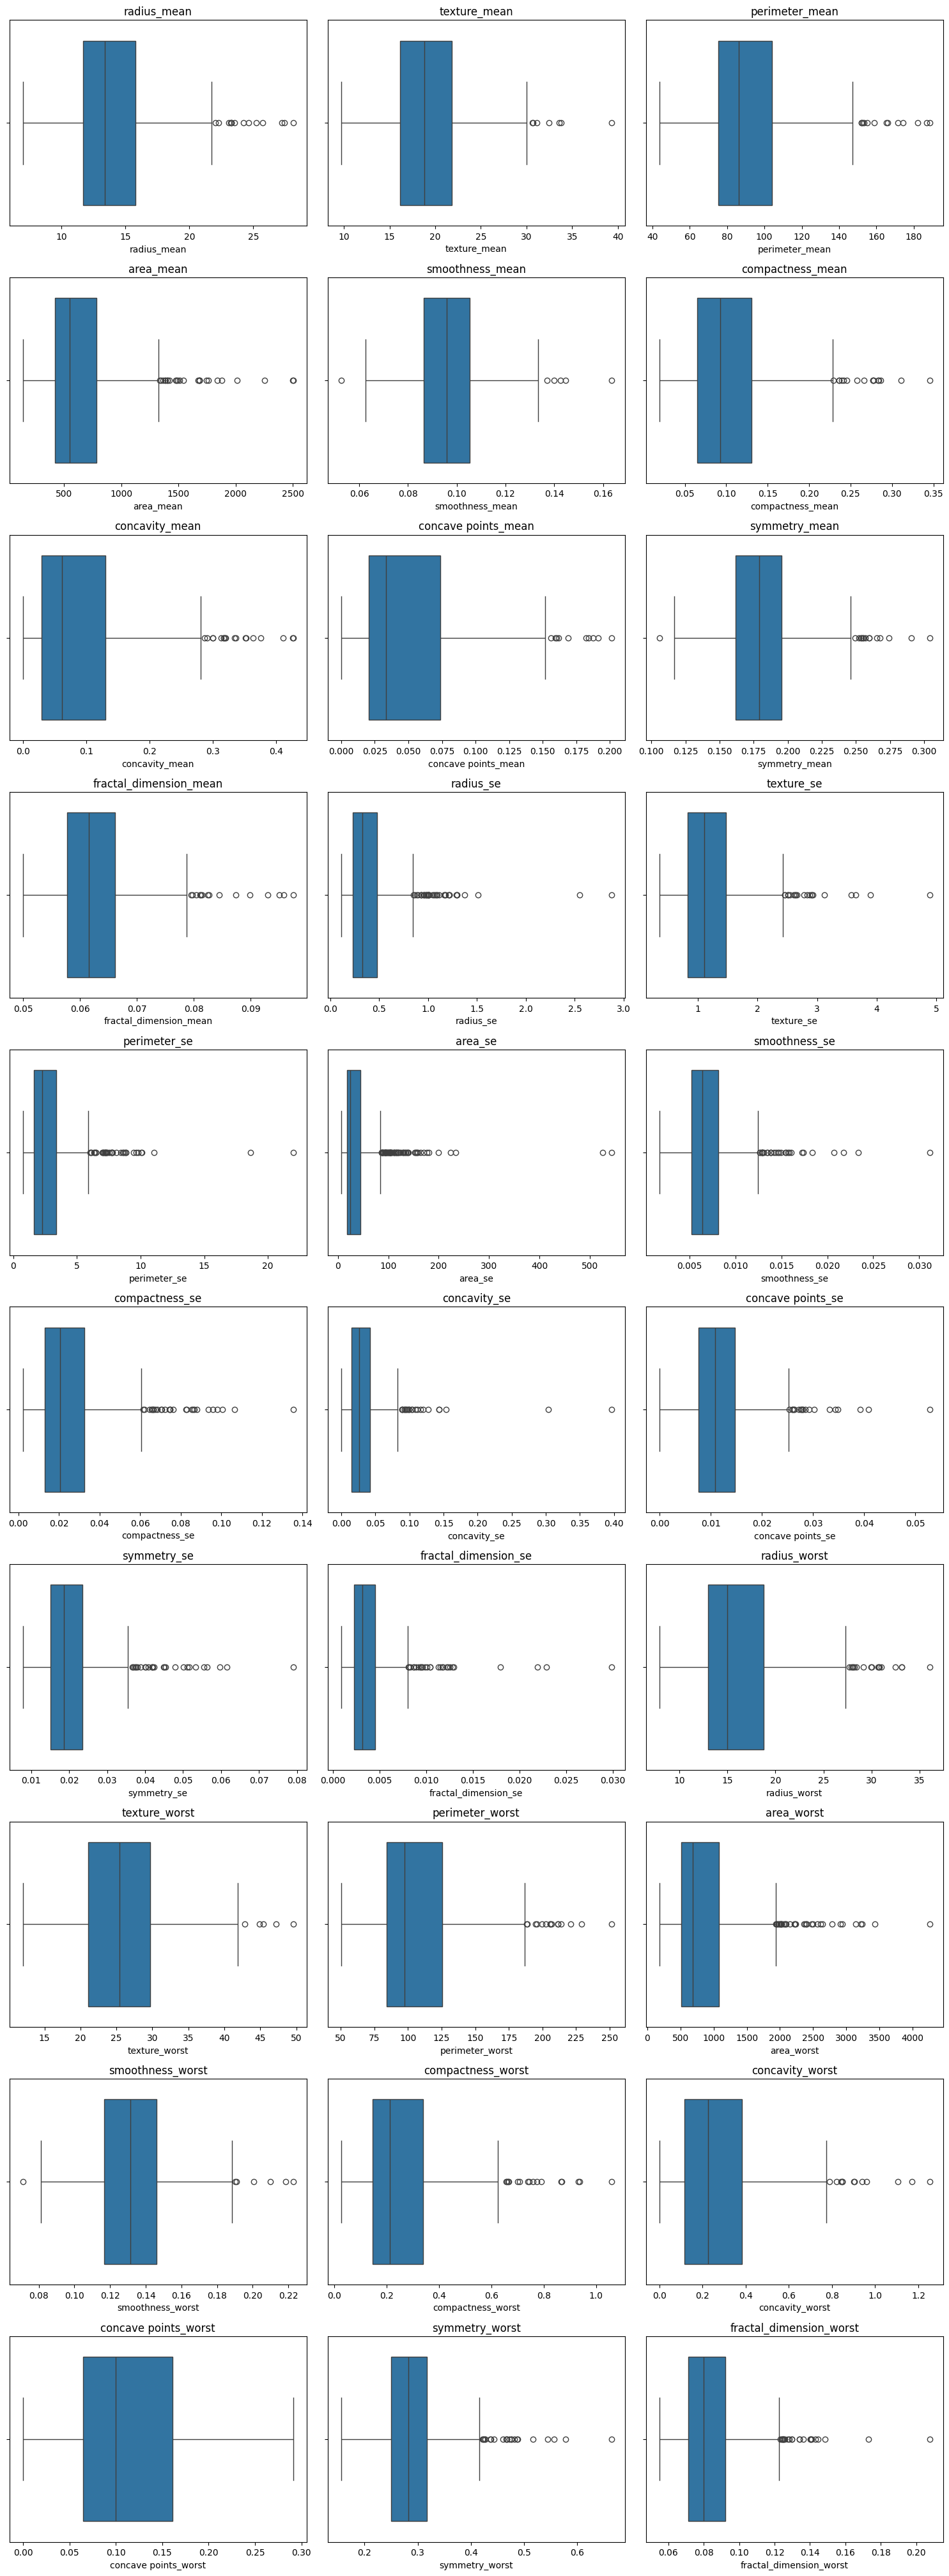

In [ ]:
EDA_BoxPlots(df)

In [ ]:
def EDA_Hist(df):
  num_cols=df.select_dtypes("number").columns
  n_cols=3
  n_rows=(len(num_cols) // n_cols + 1)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
  axes=axes.flatten()
  for i,col in enumerate(num_cols):
    sns.histplot(data=df,x=col,ax=axes[i])
    axes[i].set_title(col)
  for i in range(i+1,len(axes)):
    axes[i].set_visible(False)

  plt.tight_layout()
  plt.show()

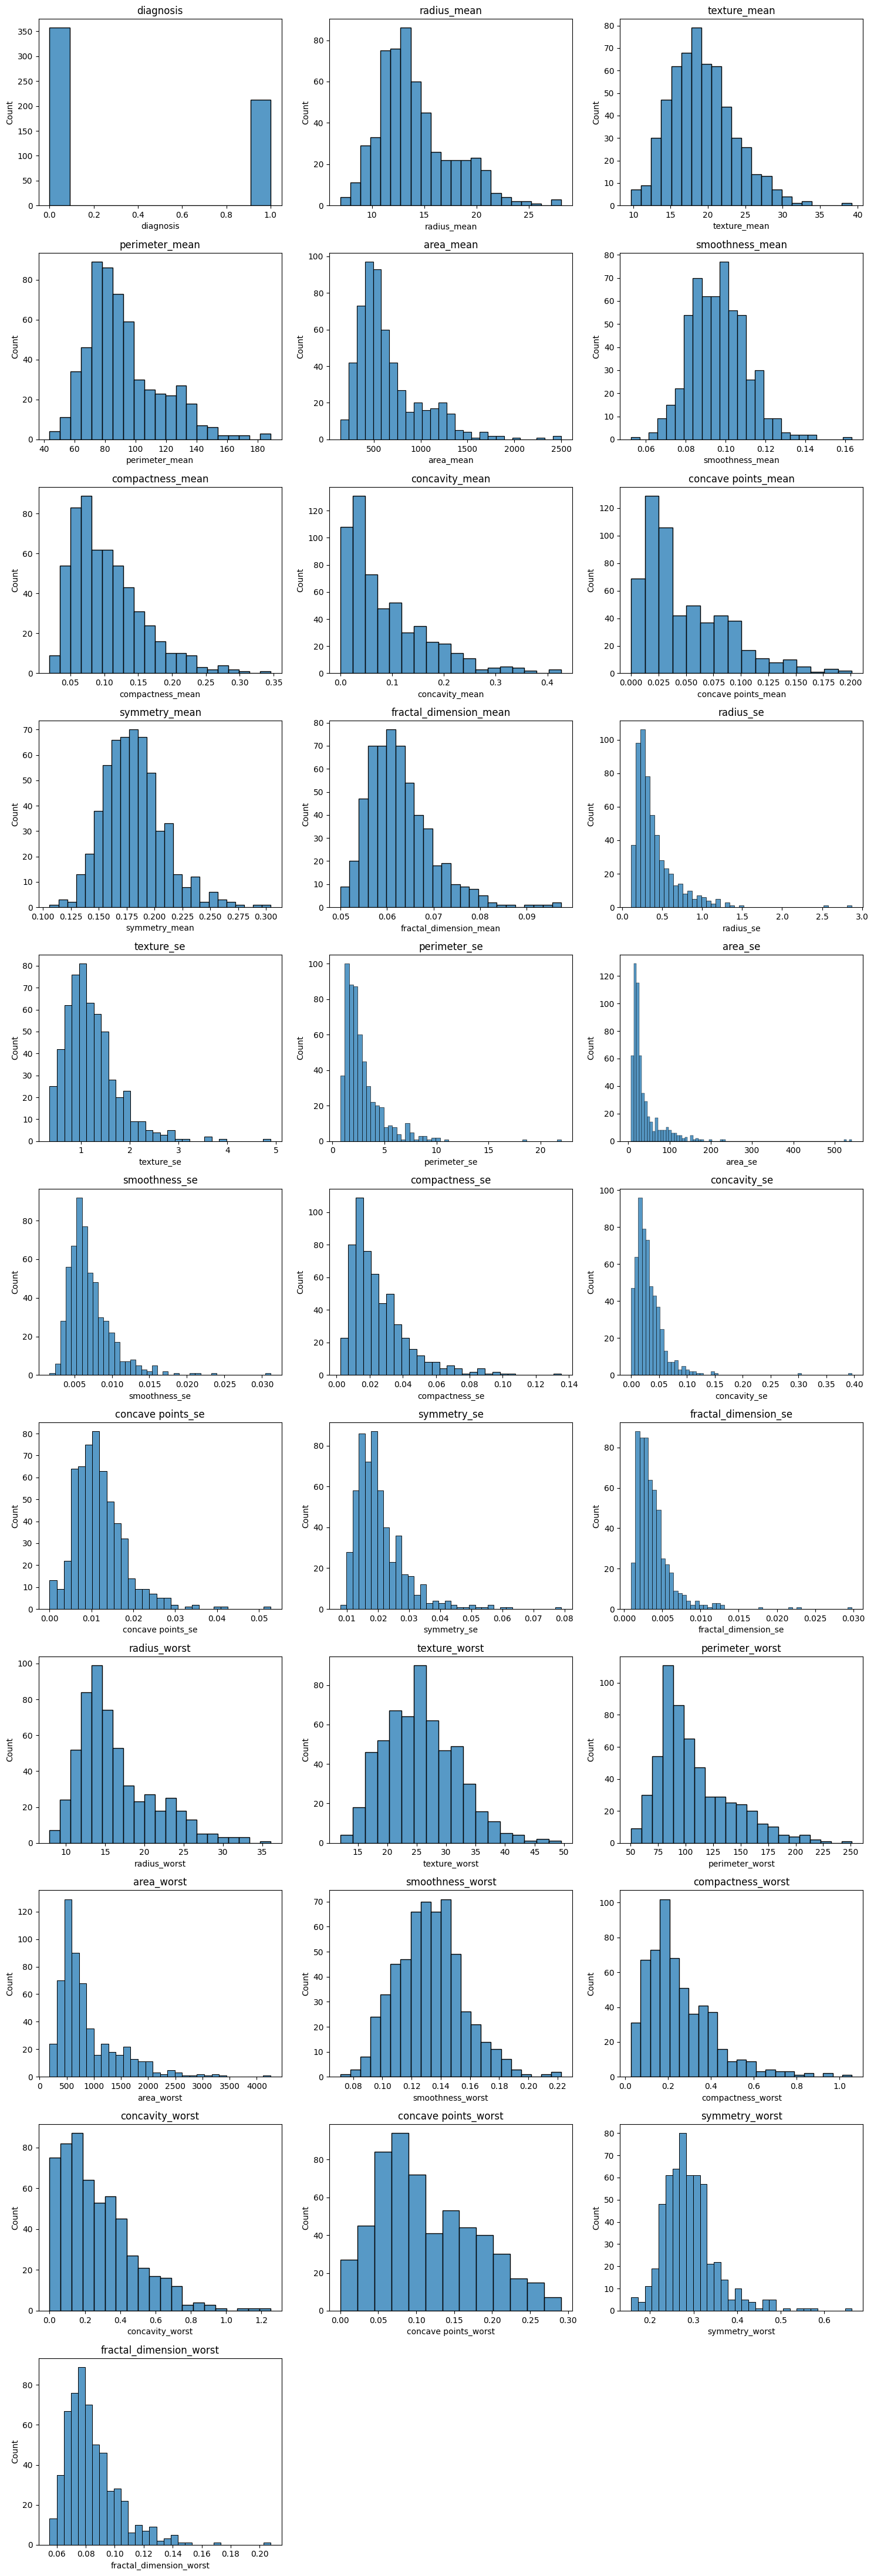

In [ ]:
EDA_Hist(df)

In [ ]:
def EDA_scatterPlots(df):
  num_cols=df.drop("diagnosis",axis=1).select_dtypes("number").columns
  n_cols=3
  n_rows=(len(num_cols) // n_cols + 1)
  fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,n_rows*4))
  axes=axes.flatten()
  for i,col in enumerate(num_cols):
    sns.scatterplot(data=df,x="diagnosis",y=col,ax=axes[i])
    axes[i].set_title(f"{col}Vs.diagnosis")
  for j in range(i+1,len(axes)):
    axes[j].set_visible(False)
  plt.tight_layout()
  plt.show()

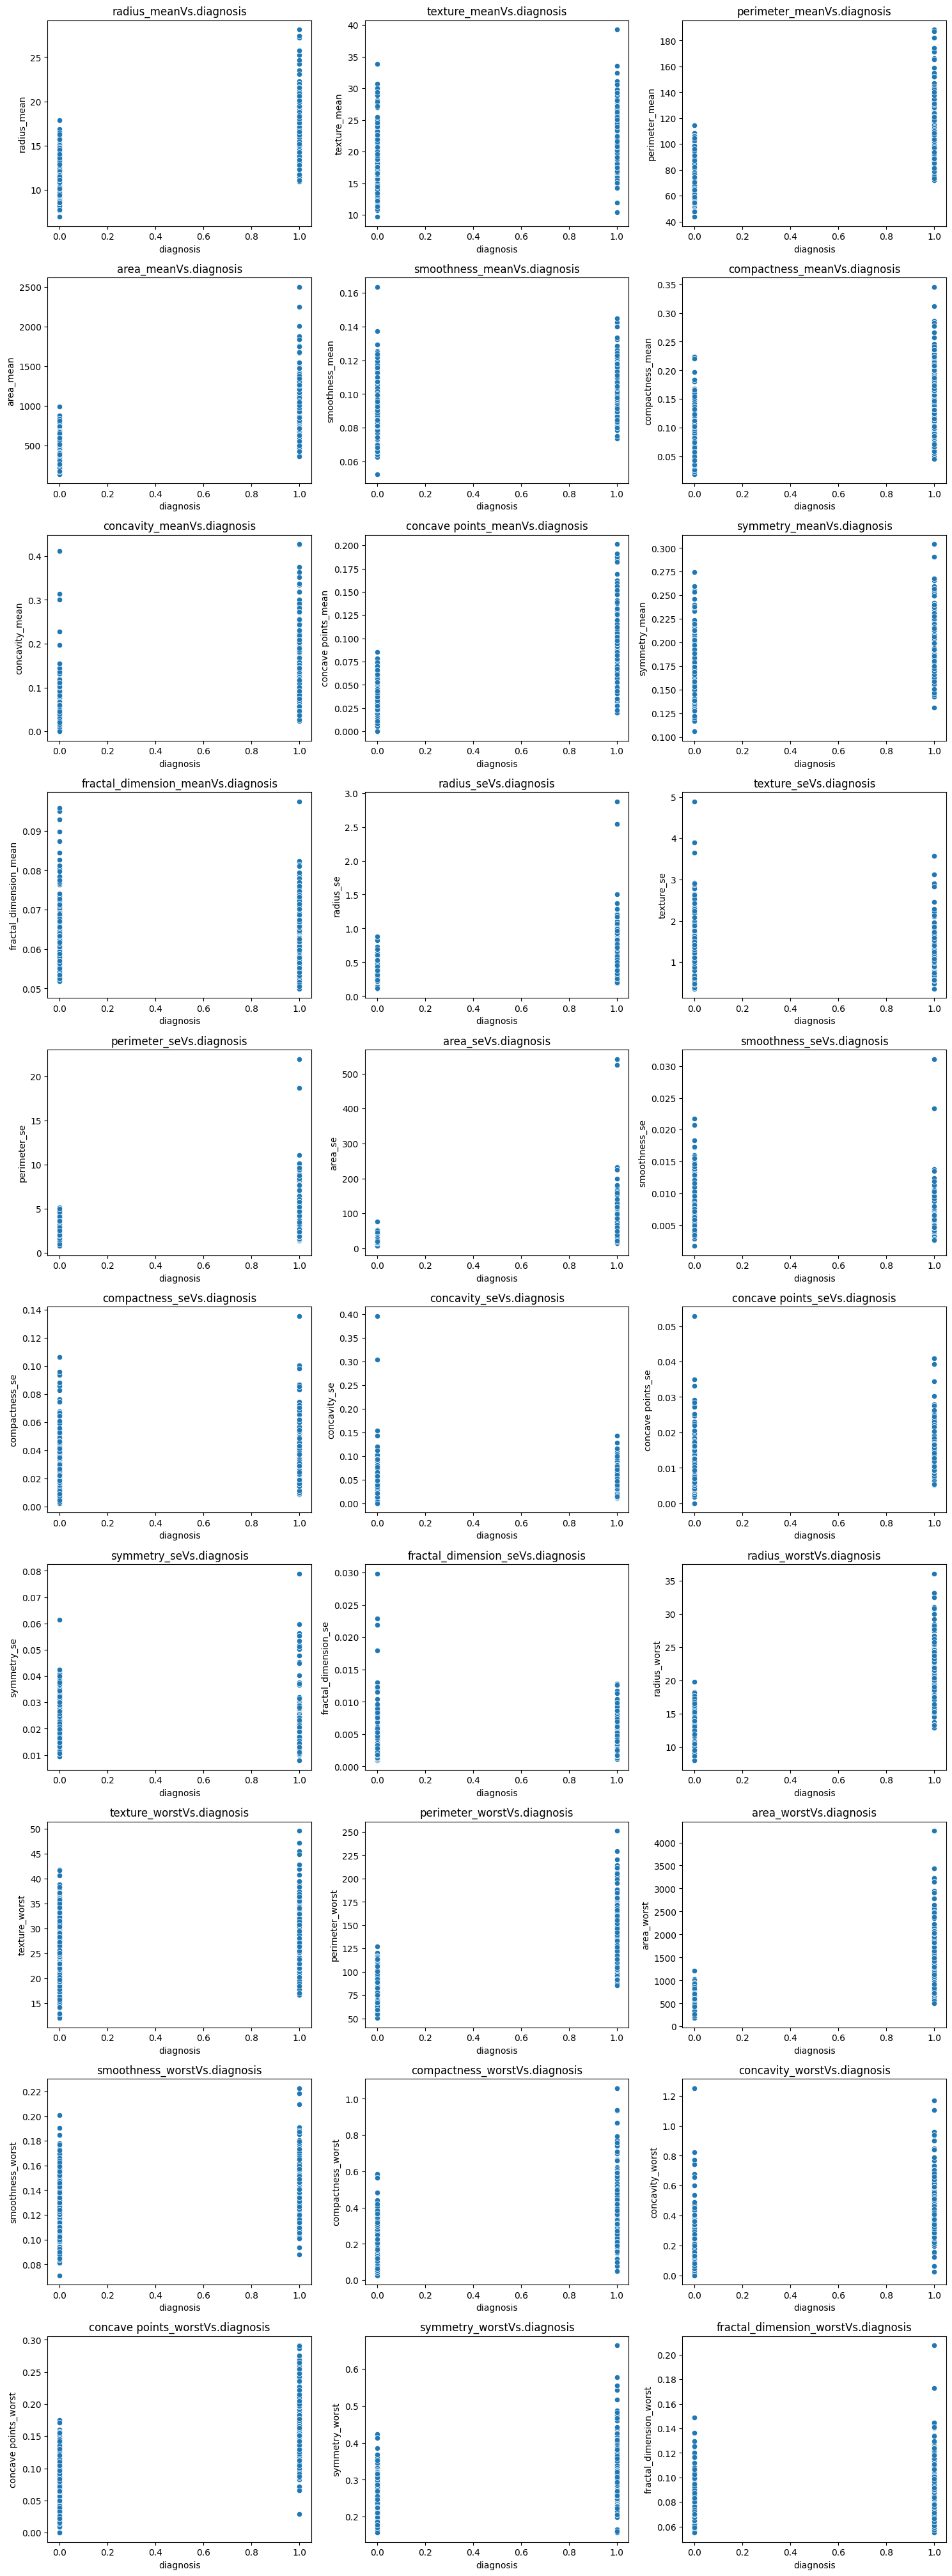

In [ ]:
EDA_scatterPlots(df)

In [ ]:
#Correlation matrix:
corre=df.drop("diagnosis",axis=1).corr()
corre

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


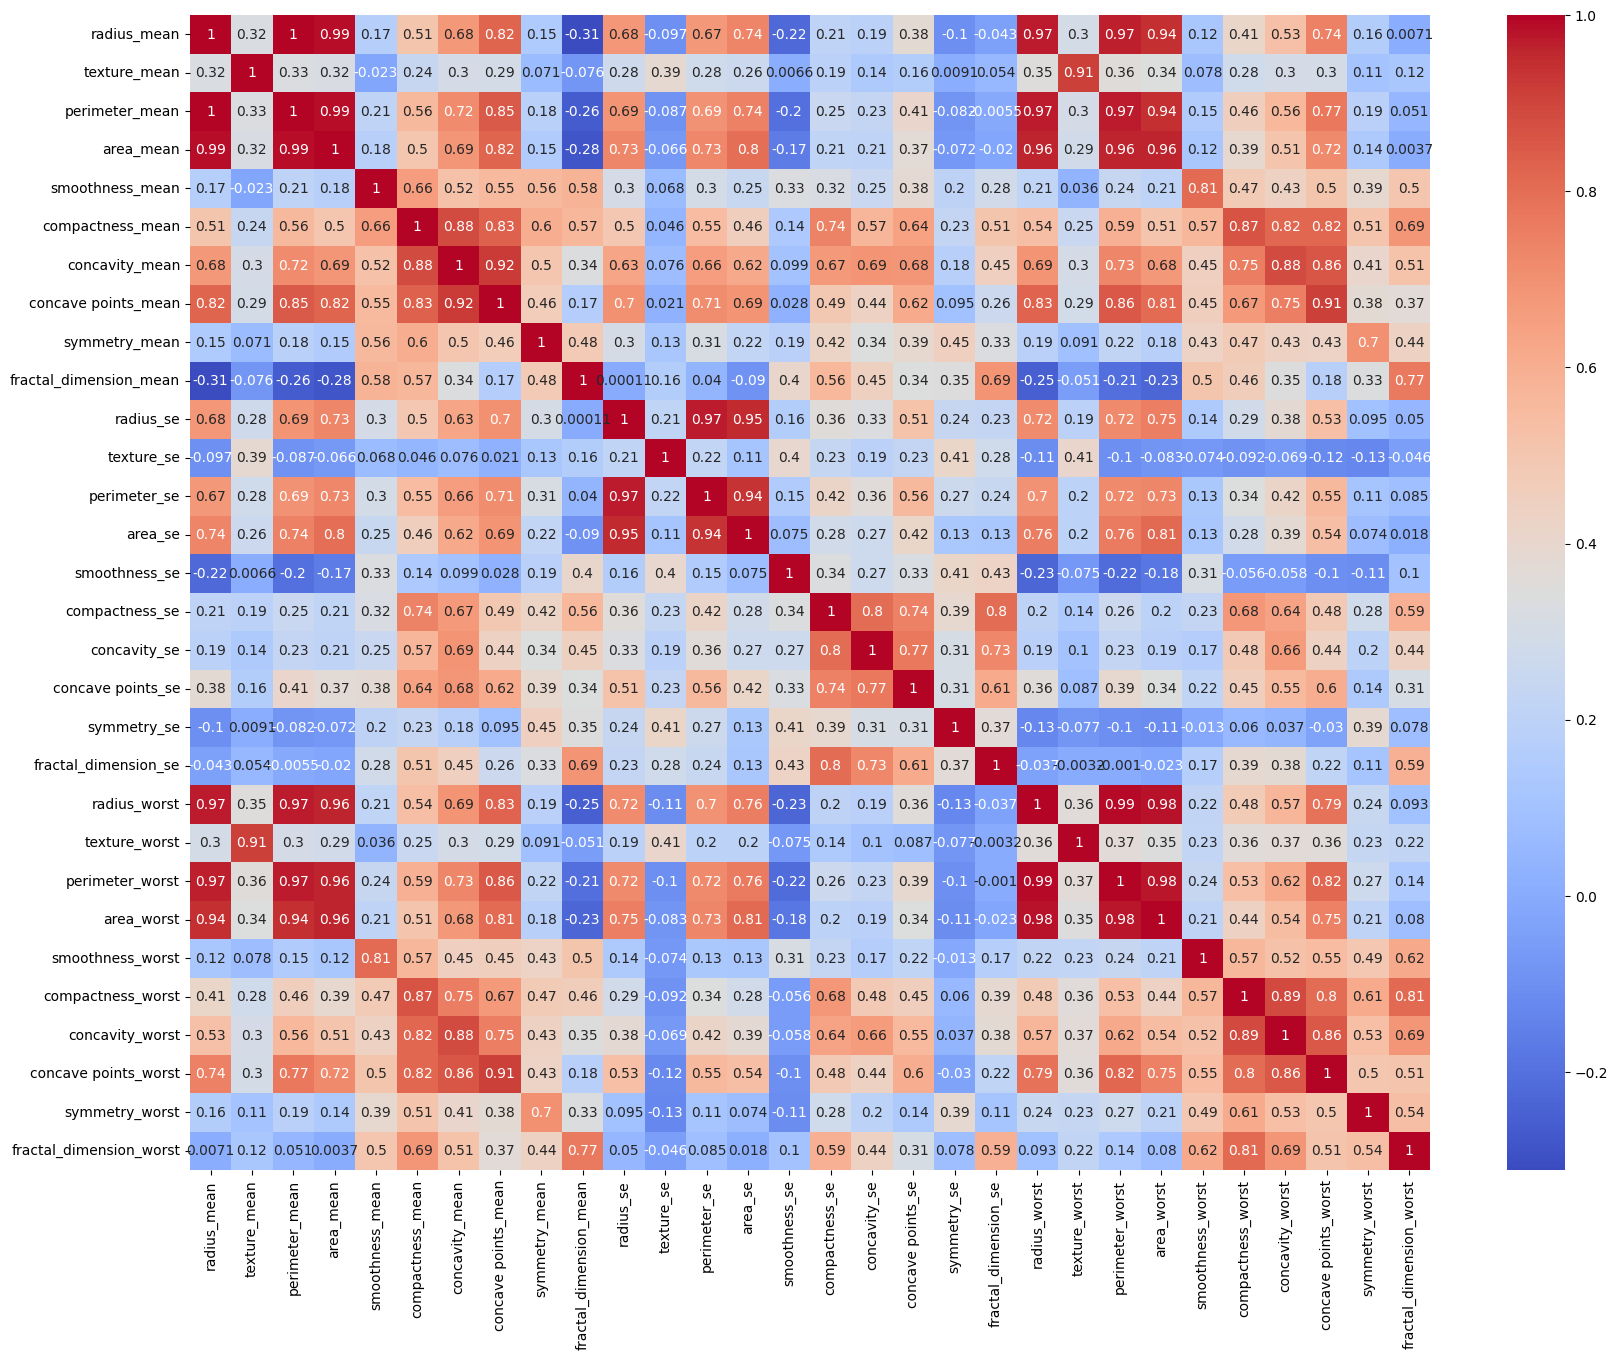

In [ ]:
#Heatmap:
plt.figure(figsize=(20,15))
sns.heatmap(corre,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
def EDA_PairPlots(df):
    # Pairplot for feature relationships
    sns.pairplot(df, hue='diagnosis')
    # Feature distributions by outcome
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
EDA_PairPlots(df)

In [ ]:
def EDA_PairPlots(df):
    features = df.drop(columns=['diagnosis']).columns
    n_features = len(features)

    n_rows = (n_features // 4) + (1 if n_features % 4 != 0 else 0)

    fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.violinplot(data=df, x='diagnosis', y=feature, ax=axes[i])

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

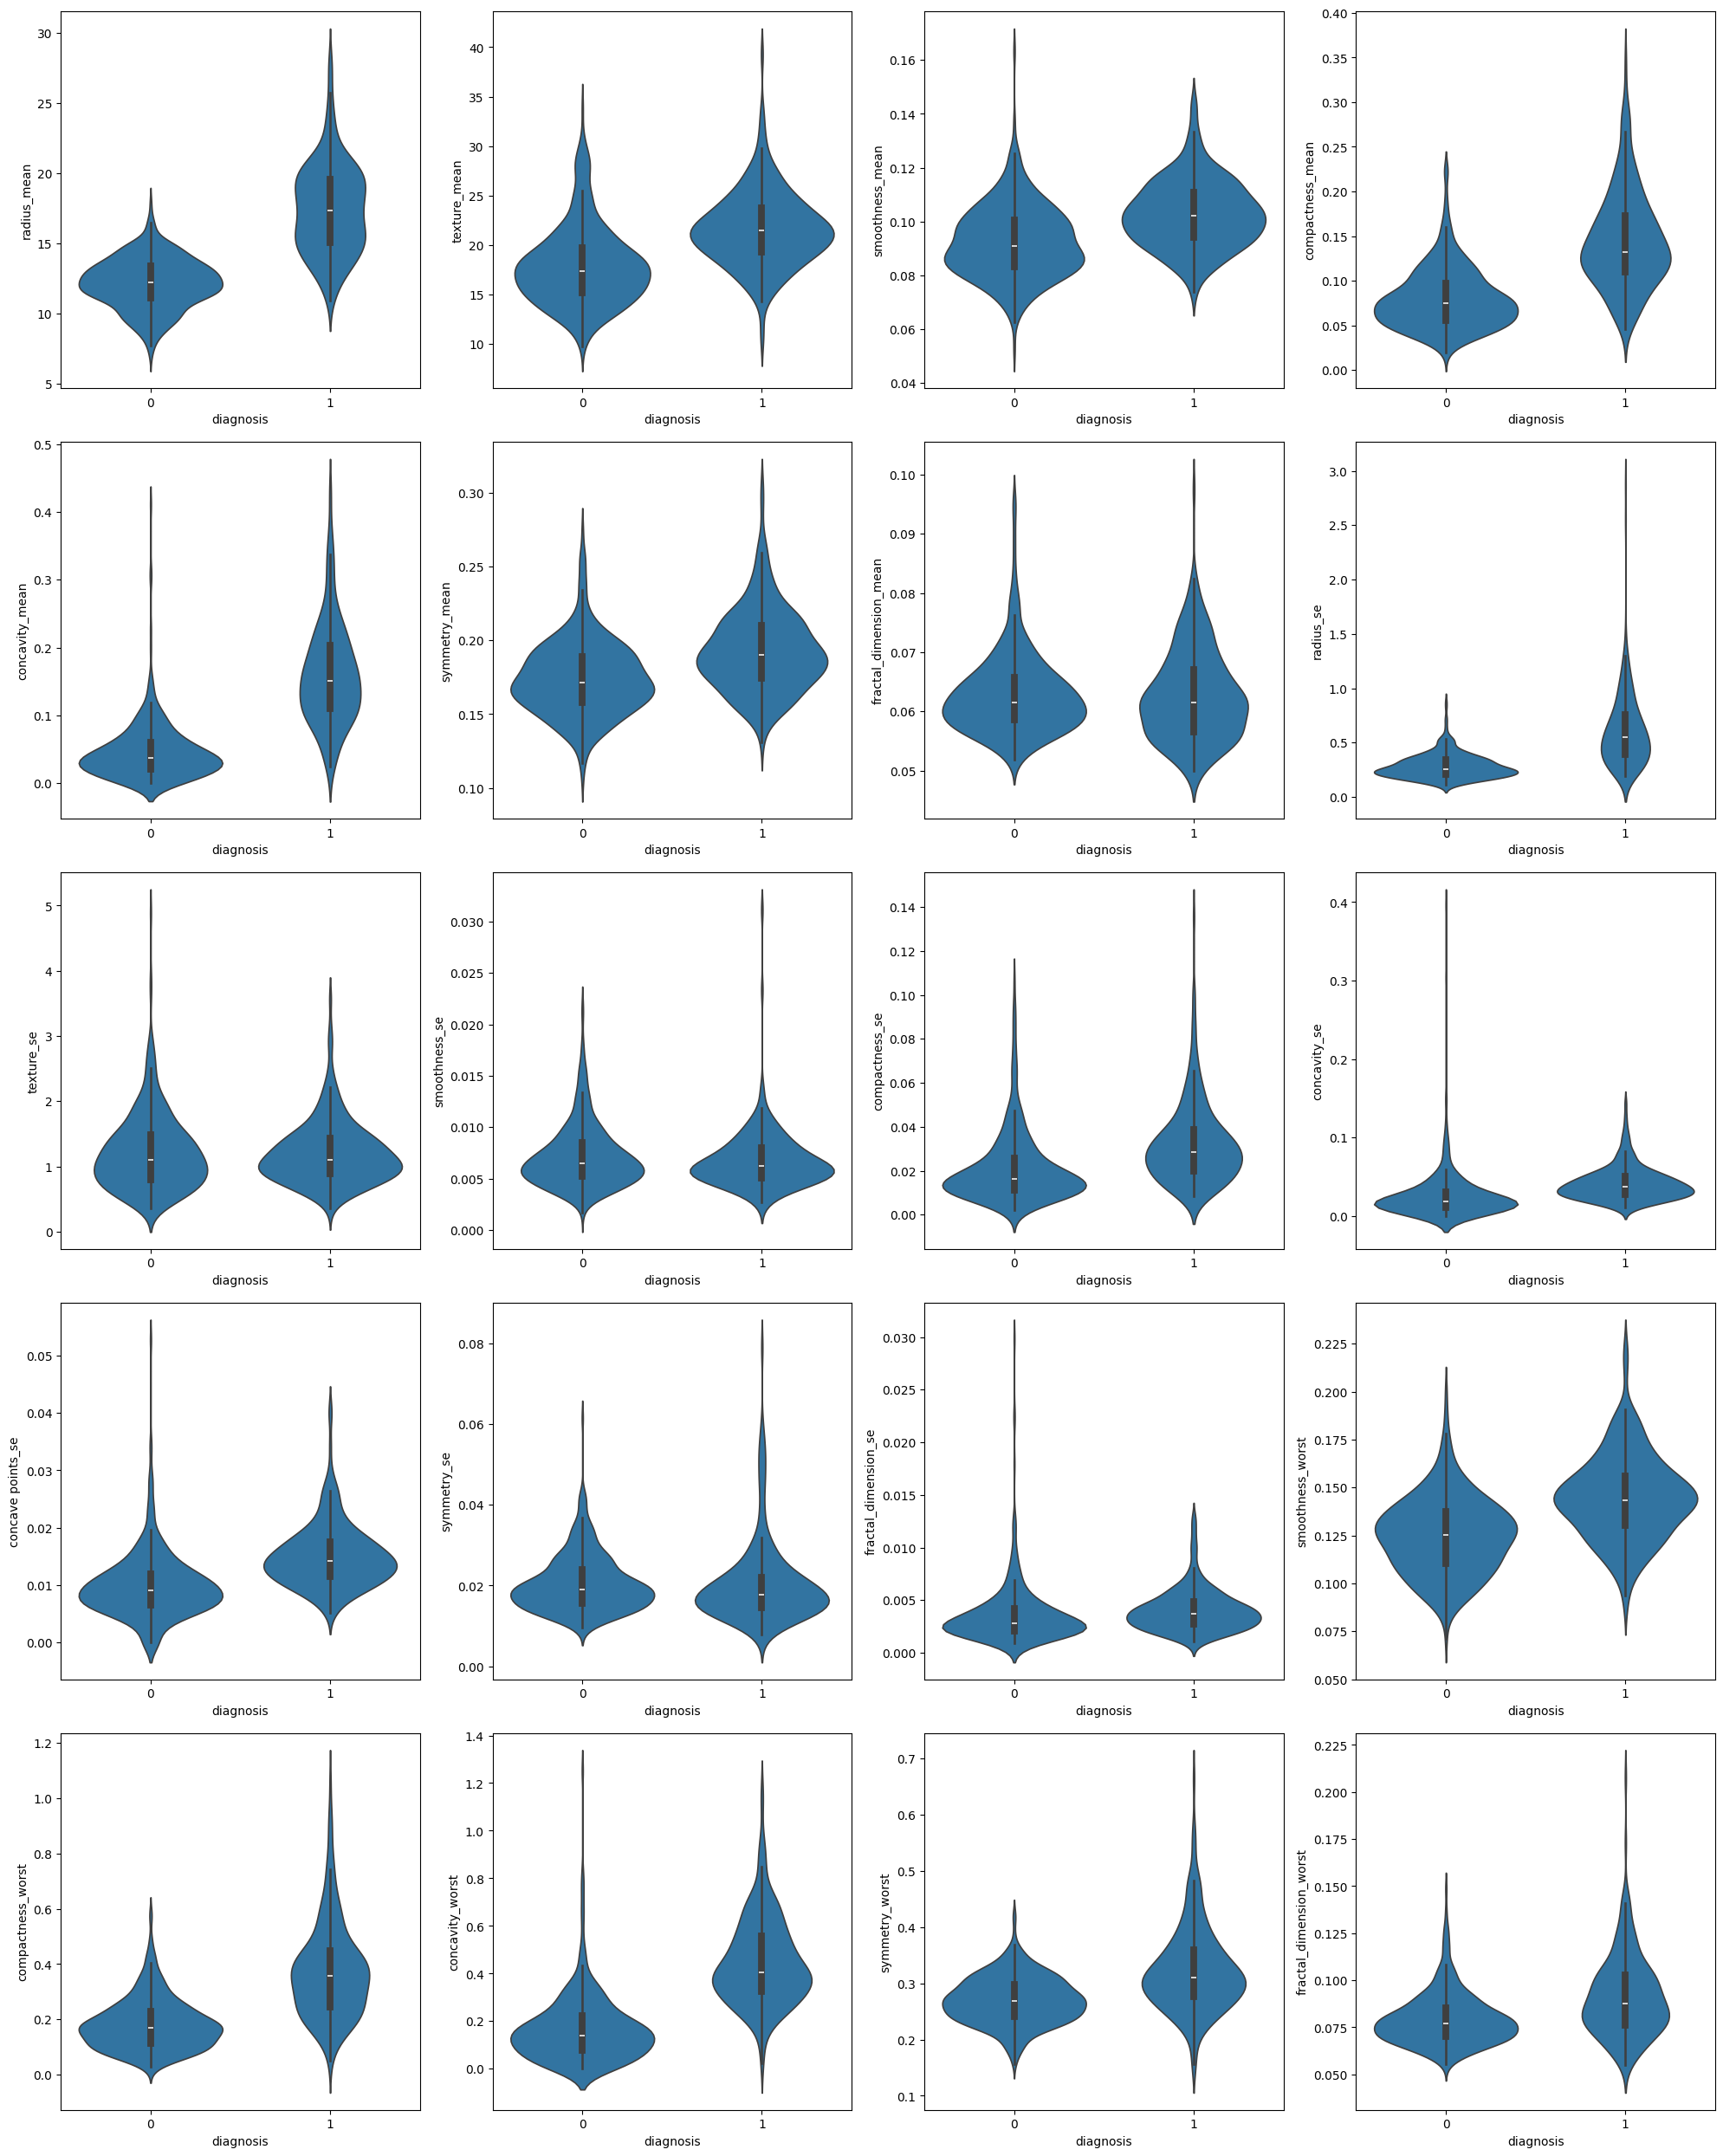

In [ ]:
EDA_PairPlots(df)

In [ ]:
def Data_Spliting_scaling(df):
  X=df.drop("diagnosis",axis=1)
  y=df["diagnosis"]
  Categorical_data=X.select_dtypes("object")
  if len(Categorical_data)>0:
    LE=LabelEncoder()
    for col in Categorical_data.columns:
      X[col]=LE.fit_transform(X[col])
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
  Scaler=StandardScaler()
  X_train=Scaler.fit_transform(X_train)
  X_test=Scaler.fit_transform(X_test)
  return X_train,X_test,y_train,y_test

In [ ]:
X_train,X_test,y_train,y_test=Data_Spliting_scaling(df)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((455, 30), (114, 30), (455,), (114,))

In [ ]:
def save_to_pickle(data,X_train, X_test, y_train, y_test, filename="preprocessing_results_30.pkl"):
  preprocessing_data = {
        'processed_dataframe': data,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': StandardScaler,
        'imputer': LabelEncoder,
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'train_shape': X_train.shape,
        'test_shape': X_test.shape}
  with open(filename,'wb') as f:
    pickle.dump(preprocessing_data,f)
  print(f"All preprocessing results saved to {filename}")
  print(f"File size: {os.path.getsize(filename) / 1024:.2f} KB")


In [ ]:
def load_preprocessing_results_pickle(filename="preprocessing_results_30.pkl"):
  with open(filename,'rb') as f:
    data=pickle.load(f)
  print(f"Data loaded from {filename}")
  print(f"Saved on: {data['timestamp']}")
  print(f"Training data shape: {data['train_shape']}")
  print(f"Test data shape: {data['test_shape']}")

  return (data['processed_dataframe'], data['X_train'], data['X_test'],
            data['y_train'], data['y_test'], data['scaler'], data['imputer'])

In [ ]:
save_to_pickle(df,X_train, X_test, y_train, y_test, filename="preprocessing_results_30.pkl")
load_preprocessing_results_pickle()

All preprocessing results saved to preprocessing_results_30.pkl
File size: 286.63 KB
Data loaded from preprocessing_results_30.pkl
Saved on: 2025-07-23 18:15:43
Training data shape: (455, 30)
Test data shape: (114, 30)


(     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0            1        17.99         10.38          122.80     1001.0   
 1            1        20.57         17.77          132.90     1326.0   
 2            1        19.69         21.25          130.00     1203.0   
 3            1        11.42         20.38           77.58      386.1   
 4            1        20.29         14.34          135.10     1297.0   
 ..         ...          ...           ...             ...        ...   
 564          1        21.56         22.39          142.00     1479.0   
 565          1        20.13         28.25          131.20     1261.0   
 566          1        16.60         28.08          108.30      858.1   
 567          1        20.60         29.33          140.10     1265.0   
 568          0         7.76         24.54           47.92      181.0   
 
      smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0            0.11840           0.27760   

In [62]:
WDBC_procced_30=df.to_csv("WDBC_procced_30.csv",index=False)